# **Fundamentos de Analítica II: Taller clase 3**

## Luis Esteban Ordoñez Erazo
## Raul Echeverry

### Universidad ICESI 


## **1. Carga de paquetes**

In [1]:
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
import pylab as py
import seaborn as sns


Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

## **2. Carga de datos**


In [2]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2018-12-01,10.725865,10835.398,1301.822,6142.856
2019-01-01,13.739328,10314.438,1642.851,6343.066
2019-02-01,12.427409,10557.917,1498.272,6264.403


En este caso los datos fueron leídos como un data frame y adicionalmente la columna "mes" fue seleccionada como indice, con el dataframe de esta forma sera más facil trabajar las series de tiempo.

A continuación se gráfica la tasa de desempleo.



(220, 4)


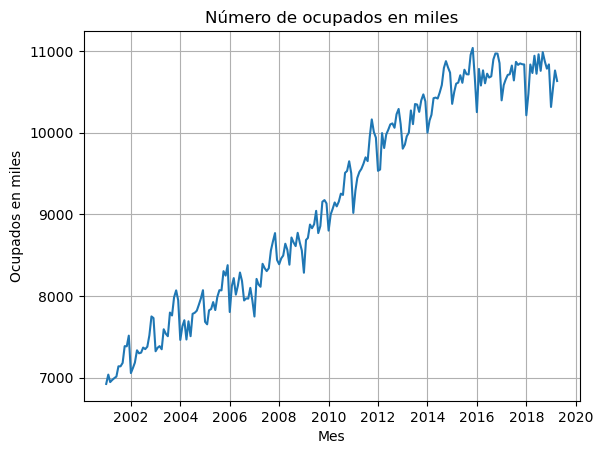

In [3]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
plt.title("Número de ocupados en miles")
plt.xlabel("Mes")
plt.ylabel("Ocupados en miles")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

## **3. Protocolo de evaluación**

Creamos un protocolo de evaluación contemplando el objetivo de predecir los seis proximos meses, por lo cual el test se usa con los ultimos seis meses.

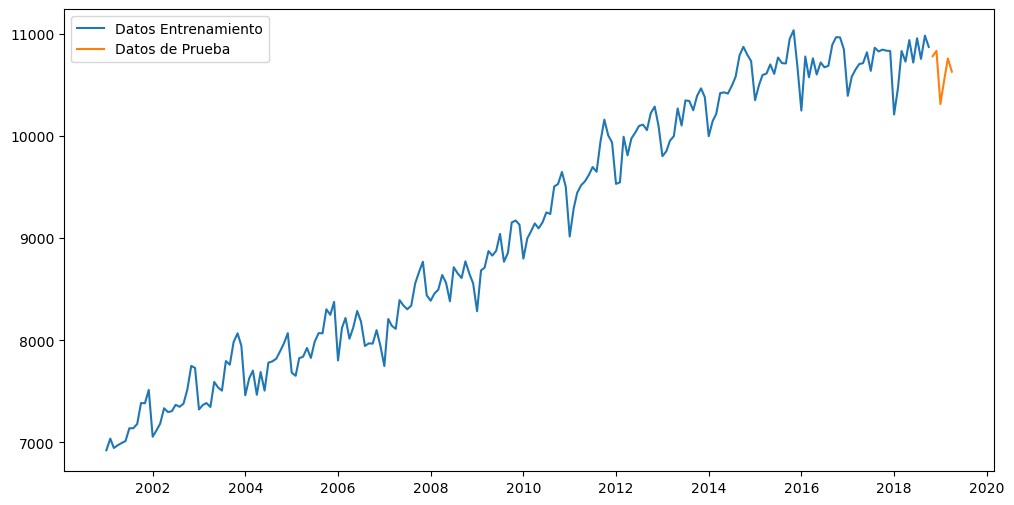

In [4]:
train_len = 214
train_ocu = data[["Ocupados"]][:train_len]
test_ocu = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_ocu,label="Datos Entrenamiento")
plt.plot(test_ocu,label="Datos de Prueba")
plt.legend()
plt.show()

## **4. Pronosticando mediante auto arima**


### **4.1. ACF y PACF**

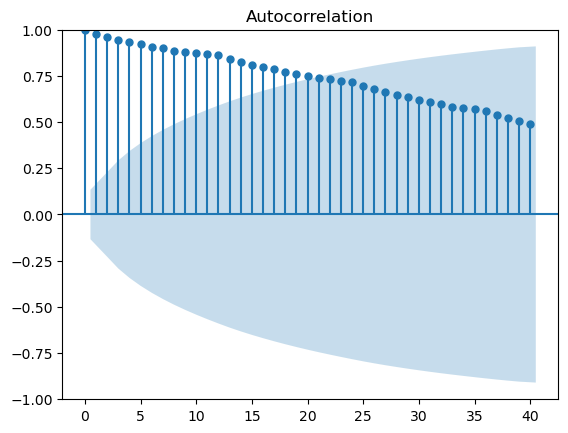

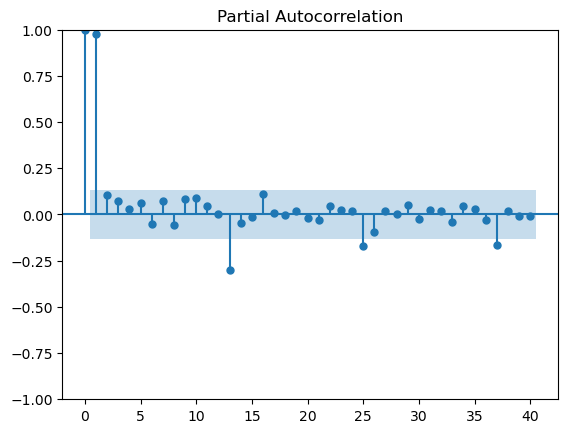

In [5]:
plot_acf(train_ocu["Ocupados"],lags=40);
plot_pacf(train_ocu["Ocupados"],lags=40);

### **4.2. Auto Arima**

In [6]:
# Auto Arima
model = auto_arima(train_ocu["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Thu, 22 Aug 2024   AIC                           2800.549
Time:                        23:02:21   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3402      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.168      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.442     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Resultado 

- AR1 (Autorregresivo): Significa que el modelo usa una observación retrasada (lag) para predecir el valor actual. Es decir, el modelo considera la dependencia con la observación anterior.

- I1 (Integrado): Significa que los datos han sido diferenciados una vez para hacerlos estacionarios. La diferenciación es un proceso de transformación que elimina tendencias en los datos, ayudando a estabilizar la media de la serie.

- MA1 (Media móvil): Significa que el modelo incluye un componente de media móvil basado en una observación retrasada del error del modelo (el residuo de la predicción anterior) para predecir el valor actual.

### Calculamos el RMSE con el dataset de Test

In [7]:
# Generar predicciones para el conjunto de test (6 meses)
n_periods = len(test_ocu)  
predictions = model.predict(n_periods=n_periods)

# Ver las predicciones
print(predictions)

# Calcular el RMSE comparando las predicciones con los valores reales de test_ocu["Ocupados"]
rmse = np.sqrt(mean_squared_error(test_ocu["Ocupados"], predictions))

print(f"RMSE: {rmse}")


2018-11-01    10918.120134
2018-12-01    10947.966669
2019-01-01    10971.604439
2019-02-01    10992.476002
2019-03-01    11012.115130
2019-04-01    11031.205167
Freq: MS, dtype: float64
RMSE: 381.6786317054691


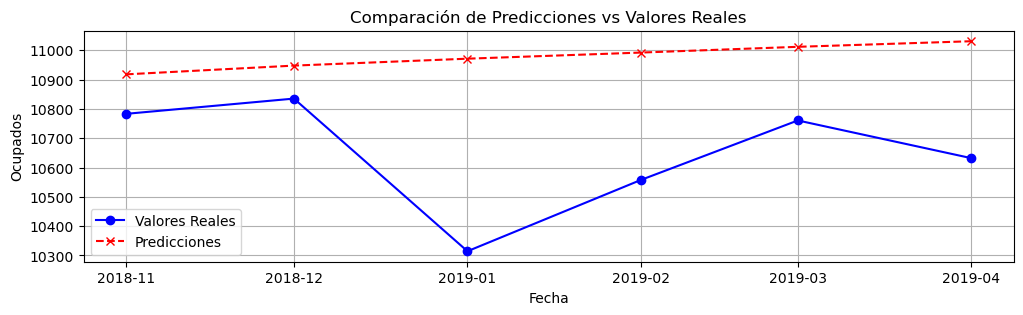

In [8]:
# Crear un gráfico de las predicciones y los valores reales
plt.figure(figsize=(12, 3))
plt.plot(test_ocu.index, test_ocu["Ocupados"], label="Valores Reales", color="blue", marker='o')
plt.plot(test_ocu.index, predictions, label="Predicciones", color="red", linestyle='--', marker='x')
plt.title("Comparación de Predicciones vs Valores Reales")
plt.xlabel("Fecha")
plt.ylabel("Ocupados")
plt.legend()
plt.grid(True)
plt.show()

Se puede obervar que la predicción no es tan buena como los modelos utilziados en ejercicios anteriores, los cuales fueron: Medias Moviles, Suavización Exponencial Simple, Lineal (Holt), Lineal de Winters (Holt-Winters), Regresión Lineal y funciones polinómicas de distintos grados (Con y sin estacionalidad).

## **5. Revisión de residuales para validación de supuestos**

c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


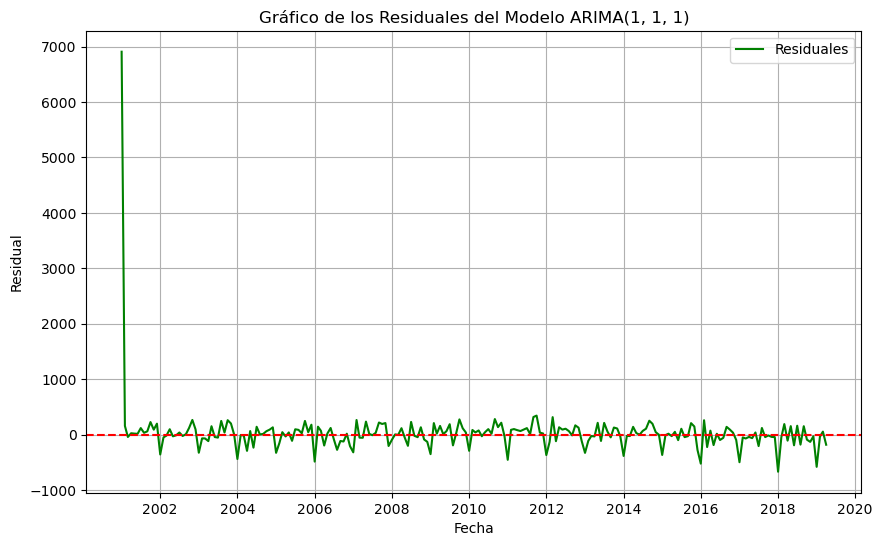

In [9]:
model_full = ARIMA(order=(1, 1, 1))
model_full.fit(data["Ocupados"])


# Obtener las predicciones ajustadas (in-sample predictions)
fitted_values = model_full.predict_in_sample()
# Calcular los residuales
residuals = data["Ocupados"] - fitted_values
# Crear una tabla de los residuales
residuals_table = pd.DataFrame({'Residual': residuals})

# Graficar los residuales
plt.figure(figsize=(10, 6))
# Plot de los residuales
plt.plot(data.index, residuals, label="Residuales", color="green")
plt.title("Gráfico de los Residuales del Modelo ARIMA(1, 1, 1)")
plt.xlabel("Fecha")
plt.ylabel("Residual")
plt.axhline(0, color='red', linestyle='--')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

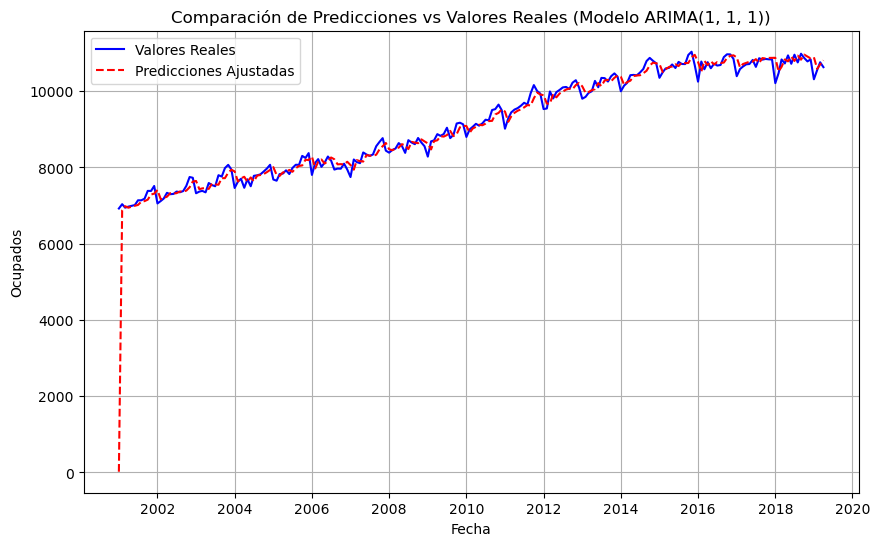

In [10]:
# Graficar los valores ajustados vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Ocupados"], label="Valores Reales", color="blue")
plt.plot(data.index, fitted_values, label="Predicciones Ajustadas", color="red", linestyle='--')
plt.title("Comparación de Predicciones vs Valores Reales (Modelo ARIMA(1, 1, 1))")
plt.xlabel("Fecha")
plt.ylabel("Ocupados")
plt.legend()
plt.grid(True)
plt.show()

# Validación de supuestos sobre los residuales

### *A.Validación de supuesto de Autocorrelación*
Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [11]:
signo=residuals_table["Residual"]>0
runstest_1samp(signo, correction=False)

(-1.571345233422389, 0.1161024797245571)

El segundo valor corresponde al p-valor=0.1161024797245571, por lo tanto considerando un $α$=0.05, los resultados obtenidos permiten no rechazar la hipótesis nula, es decir,  se sugiere que no existe autocorrelación entre las variables **- No presenta autocorrelación**. 

Este análisis debe complementarse con otras pruebas como la prueba de Box-Pierce y la modificación de Ljung-Box para muestras pequeñas.

In [12]:
Resul_lb_bp = sm.stats.acorr_ljungbox(residuals_table["Residual"], lags=range(1,11), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,0.107760,0.742709,0.106304,0.744392,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
2,0.119824,0.941847,0.118151,0.942636,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
3,0.119838,0.989355,0.118164,0.989572,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
4,0.129045,0.998006,0.127122,0.998064,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
5,0.144724,0.999597,0.142307,0.999614,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
6,0.147607,0.999937,0.145086,0.999940,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
7,0.176491,0.999984,0.172799,0.999985,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
8,0.179586,0.999997,0.175754,0.999998,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
9,0.295688,0.999997,0.286104,0.999997,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
10,0.295846,0.999999,0.286253,1.000000,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr


En el anterior data frame las columnas lb_ho y bp_ho nos permiten entender la decisión a tomar, al usar las dos pruebas, en general para los rezagos se observa el mismo comportamiento, por lo tanto se puede concluir que la serie **SI** parece comportarse como un ruido blanco, **no presenta autocorrelación**.

### *B.Homoscedasticidad y Heteroscedasticidad*

Ahora nos queda por chequear si existe problemas de heteroscedasticidad, en
especial un comportamiento tipo ARCH o GARCH, esto implica que la varianza de la serie tenga un comportamiento no autocorrelacionado.

Una aproximación para determinar si existe un comportamiento GARCH o
ARCH es emplear la prueba de Ljung-Box sobre la serie (sin media) al cuadrado.

$H{0}:$ Comportamiento Homoscedastico (Es decir varianza constante) 

$H{1}:$ Comportamiento Heteroscedastico (Es decir varianza no constante)

In [13]:
sm.stats.acorr_ljungbox((residuals_table["Residual"]-residuals_table["Residual"].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.000027,0.995832,0.000027,0.995860
2,0.000113,0.999944,0.000111,0.999945
3,0.000232,0.999999,0.000228,0.999999
4,0.000358,1.000000,0.000350,1.000000
5,0.000489,1.000000,0.000477,1.000000
6,0.000576,1.000000,0.000560,1.000000
7,0.000727,1.000000,0.000705,1.000000
8,0.000883,1.000000,0.000854,1.000000
9,0.000883,1.000000,0.000855,1.000000
10,0.001037,1.000000,0.001000,1.000000


Dado que todos los p-values son mayores que 0.05 (de hecho, son extremadamente altos), no hay evidencia suficiente para rechazar la hipótesis nula $H{0}$.
​

Esto significa que, según la prueba de Ljung-Box sobre los residuales al cuadrado, no parece haber problemas de heteroscedasticidad. La varianza de los residuales parece ser constante a lo largo del tiempo, lo que indica un comportamiento homoscedástico.

En resumen, los resultados sugieren que la serie tiene varianza constante y no presenta un comportamiento tipo ARCH o GARCH.

### *C. Normalidad*
Finalmente, podemos evaluar si la serie sigue una distribución normal o no. Noten que esto no es necesario para ser ruido blanco, solo para ser ruido blanco gaussiano. Primero hagamos un análisis gráfico empleando las siguientes lineas de código.

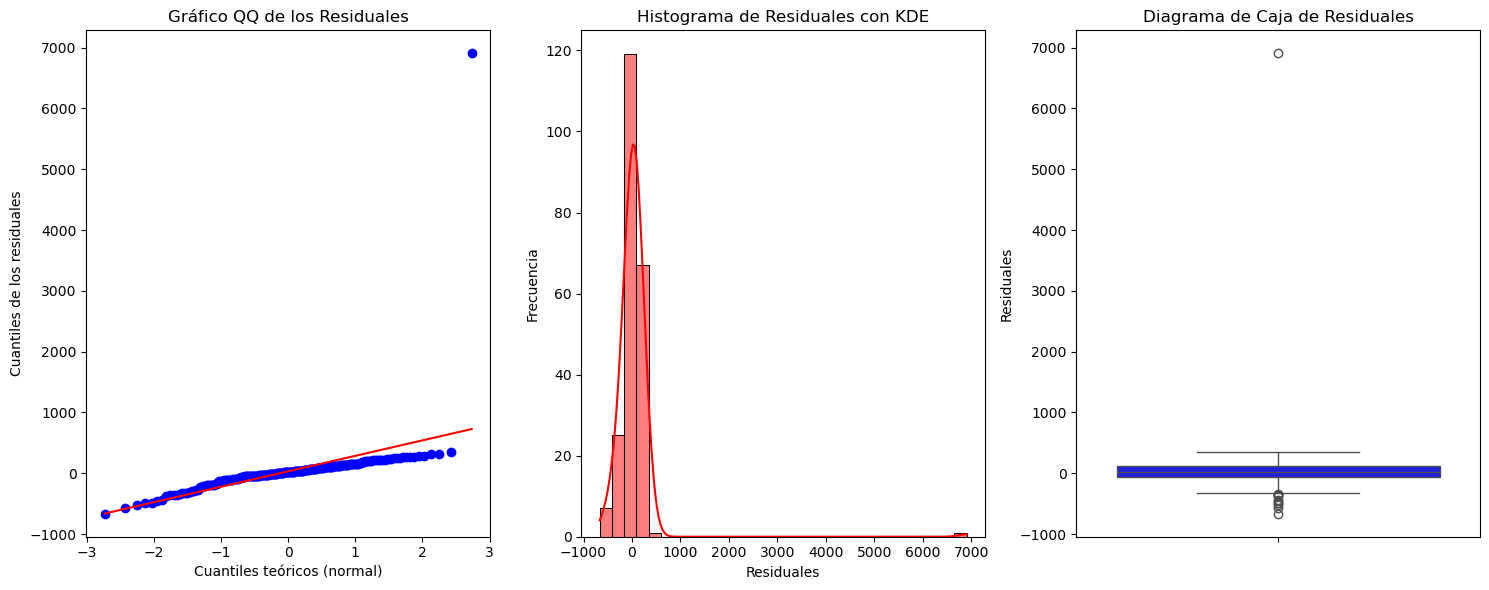

In [14]:
residuos=residuals_table["Residual"]
# Comprobación gráfica para la normalidad de los residuos
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Gráfico QQ de los Residuales
stats.probplot(residuos, dist="norm", plot=axes[0])
axes[0].set_title('Gráfico QQ de los Residuales')
axes[0].set_xlabel('Cuantiles teóricos (normal)')
axes[0].set_ylabel('Cuantiles de los residuales')

# Histograma de Residuales
sns.histplot(residuos, kde=True, bins=30, color='r', edgecolor='k', ax=axes[1])
axes[1].set_xlabel('Residuales')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Residuales con KDE')

# Diagrama de Caja de Residuales
sns.boxplot(y=residuos, color='blue', ax=axes[2])
axes[2].set_ylabel('Residuales')
axes[2].set_title('Diagrama de Caja de Residuales')

fig.tight_layout()
plt.show()

In [15]:
stats.shapiro(residuals_table["Residual"])

ShapiroResult(statistic=0.27220530009476285, pvalue=1.381148851747243e-28)

In [16]:
stats.jarque_bera(residuals_table["Residual"])

SignificanceResult(statistic=256230.60839809227, pvalue=0.0)

Ambas pruebas apuntan claramente a la misma conclusión: los residuos del modelo no siguen una distribución normal. La violación de esta suposición puede afectar la validez de las inferencias y predicciones del modelo, por lo se sugiere considerar ajustes en el modelo, transformaciones de los datos, o utilizar modelos que no requieran la suposición de normalidad.

## *Resumen*
1. No hay autocorrelación - Si cumple supuesto
2. Hay homocedasticidad - Si cumple supuesto
3. Hay Normalidad - No cumple supuesto

## **6. Usando ARIMA (1, 1, 1) para ajustar los datos del dataset completos**


In [17]:
# teniendo en cuenta los parametros ARIMA(1,1,1), fitiamos el data set completo
model = ARIMA(order=(1,1,1))
results = model.fit( data["Ocupados"])
results.summary()

c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1439.368
Date:                Thu, 22 Aug 2024   AIC                           2886.736
Time:                        23:02:26   BIC                           2900.292
Sample:                    01-01-2001   HQIC                          2892.211
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8034      2.519      3.892      0.000       4.866      14.740
ar.L1          0.4417      0.103      4.285      0.000       0.240       0.644
ma.L1         -0.8600      0.054    -15.921      0.000      -0.966      -0.754
sigma2      2.973e+04   2523.646     11.779      0.000    2.48e+04    3.47e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                55.64
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.98
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **7. Intervalos de confianza usando boostrap**

Dado que al revisar los supuestos de los residuales, no se cumplio el supuesto de normalidad se procese a usar intervalos de confianza con boostrap


In [29]:
h= 6
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0) 

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

last_date = data.index[-1]
index_future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=h, freq='MS')

# Asignar el índice de fechas al DataFrame de predicciones
preds.index = index_future_dates


preds


,Point_forecast,lower_95,upper_95
2019-05-01,10738.380599,10303.069453,11022.872119
2019-06-01,10795.154874,9877.551523,11348.067371
2019-07-01,10830.032771,9477.118274,11651.366246
2019-08-01,10855.240085,9067.014442,11954.811587
2019-09-01,10876.176365,8637.972781,12244.414270
2019-10-01,10895.226333,8221.711602,12531.885215


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1632\2401913746.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x_for = pd.date_range(start=data.index[-1], periods=h + 1, freq='M')[1:]


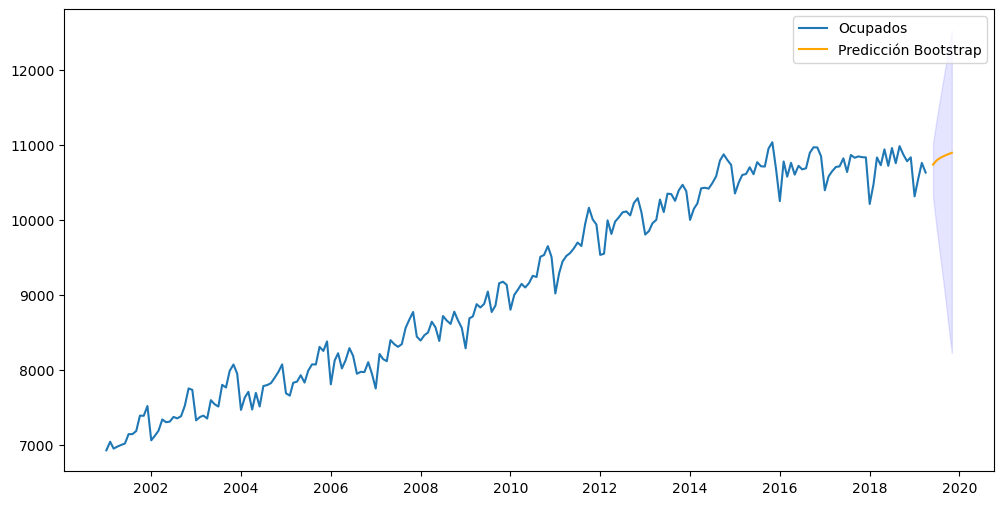

In [30]:

x_for = pd.date_range(start=data.index[-1], periods=h + 1, freq='M')[1:]

fig = plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ocupados"], label="Ocupados")
plt.plot(x_for, preds['Point_forecast'], label="Predicción Bootstrap", color='orange')
plt.fill_between(x_for, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


## **8. Predicción**


In [20]:
preds.rename(columns={'Point_forecast': 'Predicción'}, inplace=True)
preds_final = preds[['Predicción']]
preds_final

,Predicción
2019-05-01,10738.380599
2019-06-01,10795.154874
2019-07-01,10830.032771
2019-08-01,10855.240085
2019-09-01,10876.176365
2019-10-01,10895.226333
